## Observations and Insights

## Dependencies and starter code

In [193]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_result=pd.merge(mouse_metadata,study_results,on="Mouse ID")
mouse_result.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [194]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_result.describe()







,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Bar plots

Text(0.5, 1.0, 'Data Point Count for each Regimen')

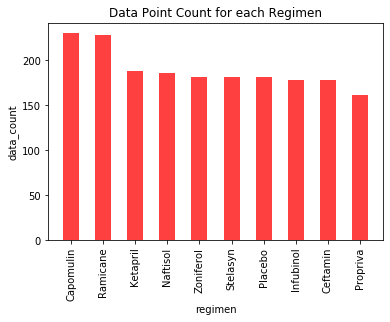

In [195]:
# Generate a bar plot showing number of data points for each treatment regimen

# Create data points counts data for each treatment regimen
count=mouse_result["Drug Regimen"].value_counts()

#Define values for x and y axis
counts=[v for v in count]
x_axis=[j for j in range(1,11)]

#Ploting the bar chart for the datapoint count for each treatment regimen
plt.bar(x_axis, counts,color="red", alpha=0.75,align="center",width=0.5)

#Set x axis values, x axis label and y axis label
regimen_list=[v for v in count.index]
plt.xticks(x_axis,[t for t in regimen_list],rotation="vertical")
plt.xlabel("regimen")
plt.ylabel("data_count")
plt.title("Data Point Count for each Regimen")



Text(0, 0.5, 'data_count')

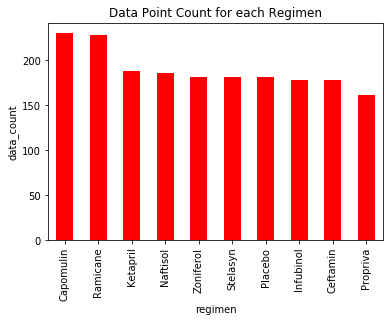

In [196]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Create data points counts data for each treatment regimen
count=mouse_result["Drug Regimen"].value_counts()

#Define values for x and y axis
counts=[v for v in count]
x_axis=[j for j in range(1,11)]

#Ploting the bar chart for the datapoint count for each treatment regimen
count_plot=count.plot(kind="bar",color="red",title="Data Point Count for each Regimen")

#Set x axis label and y axis label
count_plot.set_xlabel("regimen")
count_plot.set_ylabel("data_count")





## Pie plots

Text(0.5, 1.0, 'distribution of female vs male mouse')

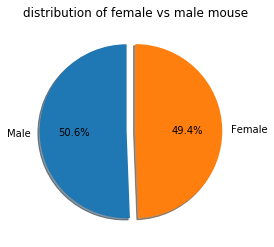

In [197]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Define elements of pie chart inlcuding explode,data,labels 
explode=(0.1,0)
mouse_sex_count=[v for v in mouse_result["Sex"].value_counts()]
mouse_sex_list=["Male","Female"]

#Plot the pie chart
plt.pie(mouse_sex_count,labels=mouse_sex_list,explode=explode,autopct="%1.1f%%", shadow=True, startangle=90)

#Add title for the Pie Chart
plt.title("distribution of female vs male mouse")



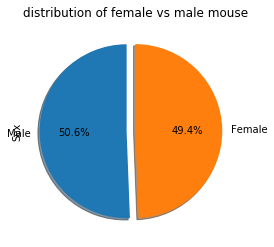

In [198]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Define pie chart elements including explode and data
explode=(0.1,0)
mouse_sex_counts=mouse_result["Sex"]

#Plot the Pie chart
mouse_sex_piechart=mouse_sex_counts.value_counts().plot(kind="pie",explode=explode,autopct="%1.1f%%",shadow=True, startangle=90,title=("distribution of female vs male mouse"))




## Quartiles, outliers and boxplots

In [199]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#For for mouse under Capomulin regimen
#Define data
last_table_Capomulin=mouse_result[mouse_result["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").last()
last_table_Capomulin.head()
last_tumor_volume_Capomulin=last_table_Capomulin["Tumor Volume (mm3)"]

#Calculating lower quantile, upper quantile, interquantile range, lower bound and upper bound
tumor_quantiles_Capomulin=last_tumor_volume_Capomulin.quantile([0.25,0.5,0.75])
lower_quantile_Capomulin=tumor_quantiles_Capomulin[0.25]
upper_quantile_Capomulin=tumor_quantiles_Capomulin[0.75]
IQR_Capomulin=upper_quantile_Capomulin-lower_quantile_Capomulin
lower_bound_Capomulin=lower_quantile_Capomulin-IQR_Capomulin*1.5
upper_bound_Capomulin=upper_quantile_Capomulin+IQR_Capomulin*1.5

#Create DataFrame to report lower quantile, upper quantile, interquantile range, lower bound and upper bound
summary_table_Capomulin=pd.DataFrame({
    "lower quantile":[lower_quantile_Capomulin,],
    "upper quantile":[upper_quantile_Capomulin,],
    "IQR":[IQR_Capomulin,],
    "lower bound":[lower_bound_Capomulin,],
    "upper bound":[upper_bound_Capomulin,]    
})


#Print report
print("for mouse under Capomulin regimen")
print("-----------------------------------------")
print(summary_table_Capomulin)

#Report if potential outliers can be found
print("outliers under Capomulin regimen")
print("-----------------------------------------")
print(last_table_Capomulin[(last_table_Capomulin["Tumor Volume (mm3)"]<lower_bound_Capomulin)&(last_table_Capomulin["Tumor Volume (mm3)"]<lower_bound_Capomulin)])
print("No Outliers")                                                              


#For for mouse under Ramicane regimen
#Define data
last_table_Ramicane=mouse_result[mouse_result["Drug Regimen"]=="Ramicane"].groupby("Mouse ID").last()
last_table_Ramicane.head()
last_tumor_volume_Ramicane=last_table_Ramicane["Tumor Volume (mm3)"]

#Calculating lower quantile, upper quantile, interquantile range, lower bound and upper bound
tumor_quantiles_Ramicane=last_tumor_volume_Ramicane.quantile([0.25,0.5,0.75])
lower_quantile_Ramicane=tumor_quantiles_Ramicane[0.25]
upper_quantile_Ramicane=tumor_quantiles_Ramicane[0.75]
IQR_Ramicane=upper_quantile_Ramicane-lower_quantile_Ramicane
lower_bound_Ramicane=lower_quantile_Ramicane-IQR_Ramicane*1.5
upper_bound_Ramicane=upper_quantile_Ramicane+IQR_Ramicane*1.5

#Create DataFrame to report lower quantile, upper quantile, interquantile range, lower bound and upper bound
summary_table_Ramicane=pd.DataFrame({
    "lower quantile":[lower_quantile_Ramicane,],
    "upper quantile":[upper_quantile_Ramicane,],
    "IQR":[IQR_Ramicane,],
    "lower bound":[lower_bound_Ramicane,],
    "upper bound":[upper_bound_Ramicane,]    
})

#Print report
print("for mouse under Ramicane regimen")
print("-----------------------------------------")
print(summary_table_Ramicane)

#Report if potential outliers can be found
print("outliers under Ramicane regimen")
print("-----------------------------------------")
print(last_table_Ramicane[(last_table_Ramicane["Tumor Volume (mm3)"]<lower_bound_Ramicane)&(last_table_Ramicane["Tumor Volume (mm3)"]<lower_bound_Ramicane)])
print("No Outliers")                                                                                                                                             


#For for mouse under Infubinol regimen
#Define data
last_table_Infubinol=mouse_result[mouse_result["Drug Regimen"]=="Infubinol"].groupby("Mouse ID").last()
last_table_Infubinol.head()
last_tumor_volume_Infubinol=last_table_Infubinol["Tumor Volume (mm3)"]

#Calculating lower quantile, upper quantile, interquantile range, lower bound and upper bound
tumor_quantiles_Infubinol=last_tumor_volume_Infubinol.quantile([0.25,0.5,0.75])
lower_quantile_Infubinol=tumor_quantiles_Infubinol[0.25]
upper_quantile_Infubinol=tumor_quantiles_Infubinol[0.75]
IQR_Infubinol=upper_quantile_Infubinol-lower_quantile_Infubinol
lower_bound_Infubinol=lower_quantile_Infubinol-IQR_Infubinol*1.5
upper_bound_Infubinol=upper_quantile_Infubinol+IQR_Infubinol*1.5

#Create DataFrame to report lower quantile, upper quantile, interquantile range, lower bound and upper bound
summary_table_Infubinol=pd.DataFrame({
    "lower quantile":[lower_quantile_Infubinol,],
    "upper quantile":[upper_quantile_Infubinol,],
    "IQR":[IQR_Infubinol,],
    "lower bound":[lower_bound_Infubinol,],
    "upper bound":[upper_bound_Infubinol,]    
})

#Print report
print("for mouse under Infubinol regimen")
print("-----------------------------------------")
print(summary_table_Infubinol)

#Report if potential outliers can be found
print("outliers under Infubinol regimen")
print("-----------------------------------------")
print(last_table_Infubinol[(last_table_Infubinol["Tumor Volume (mm3)"]<lower_bound_Infubinol)&(last_table_Infubinol["Tumor Volume (mm3)"]<lower_bound_Infubinol)])  
print("Outliers")



#For for mouse under Ceftamin regimen
#Define data
last_table_Ceftamin=mouse_result[mouse_result["Drug Regimen"]=="Ceftamin"].groupby("Mouse ID").last()
last_table_Ceftamin.head()
last_tumor_volume_Ceftamin=last_table_Ceftamin["Tumor Volume (mm3)"]

#Calculating lower quantile, upper quantile, interquantile range, lower bound and upper bound
tumor_quantiles_Ceftamin=last_tumor_volume_Ceftamin.quantile([0.25,0.5,0.75])
lower_quantile_Ceftamin=tumor_quantiles_Ceftamin[0.25]
upper_quantile_Ceftamin=tumor_quantiles_Ceftamin[0.75]
IQR_Ceftamin=upper_quantile_Ceftamin-lower_quantile_Ceftamin
lower_bound_Ceftamin=lower_quantile_Ceftamin-IQR_Ceftamin*1.5
upper_bound_Ceftamin=upper_quantile_Ceftamin+IQR_Ceftamin*1.5

#Create DataFrame to report lower quantile, upper quantile, interquantile range, lower bound and upper bound
summary_table_Ceftamin=pd.DataFrame({
    "lower quantile":[lower_quantile_Ceftamin,],
    "upper quantile":[upper_quantile_Ceftamin,],
    "IQR":[IQR_Ceftamin,],
    "lower bound":[lower_bound_Ceftamin,],
    "upper bound":[upper_bound_Ceftamin,]    
})

#Print report
print("for mouse under Ceftamin regimen")
print("-----------------------------------------")
print(summary_table_Ceftamin)

#Report if potential outliers can be found
print("outliers under Ceftamin regimen")
print("-----------------------------------------")
print(last_table_Ceftamin[(last_table_Ceftamin["Tumor Volume (mm3)"]<lower_bound_Ceftamin)&(last_table_Ceftamin["Tumor Volume (mm3)"]<lower_bound_Ceftamin)])                                                                               
print("No Outliers")



for mouse under Capomulin regimen
-----------------------------------------
   lower quantile  upper quantile       IQR  lower bound  upper bound
0       32.377357        40.15922  7.781863    20.704562    51.832015
outliers under Capomulin regimen
-----------------------------------------
Empty DataFrame
Columns: [Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
No Outliers
for mouse under Ramicane regimen
-----------------------------------------
   lower quantile  upper quantile       IQR  lower bound  upper bound
0        31.56047       40.659006  9.098537    17.912664    54.306811
outliers under Ramicane regimen
-----------------------------------------
Empty DataFrame
Columns: [Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
No Outliers
for mouse under Infubinol regimen
-----------------------------------------
   lower quantile  upper quantile        IQR  lower bound  upper

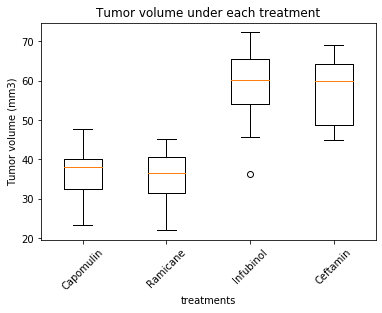

In [200]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Define x axis
x_axis=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Ploting the boxplot
fig1, ax = plt.subplots()
ax.set_title('Tumor volume under each treatment')
ax.set_ylabel('Tumor volume (mm3)')
ax.set_xlabel("treatments")
data_by_treatment=[last_tumor_volume_Capomulin,last_tumor_volume_Ramicane,last_tumor_volume_Infubinol,last_tumor_volume_Ceftamin]
ax.boxplot(data_by_treatment)
ax.set_xticklabels(x_axis,rotation=45, fontsize=10)
plt.show()



## Line and scatter plots

Text(0.5, 1.0, 'tumer volumn vs time point under Capomulin treatment for mouse s185')

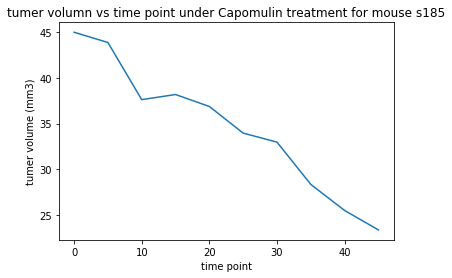

In [171]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Define data for a single mouse
mouse_result1=mouse_result[mouse_result["Drug Regimen"]=="Capomulin"]
mouse_time=mouse_result1[mouse_result1["Mouse ID"]=="s185"][["Timepoint"]]
mouse_tumer=mouse_result1[mouse_result1["Mouse ID"]=="s185"][["Tumor Volume (mm3)"]]

#Plot the line chart
plt.plot(mouse_time, mouse_tumer)
plt.xlabel("time point")
plt.ylabel("tumer volume (mm3)")
plt.title("tumer volumn vs time point under Capomulin treatment for mouse s185")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

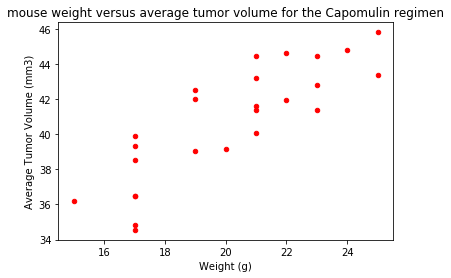

In [201]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Create table and calculate average tumor volume 
weight_vs_ave_tumor=mouse_result_Capomulin.groupby("Mouse ID")
weight_ave_tumor=weight_vs_ave_tumor.mean()

#Create the scatter plot 
weight_vs_tumor=weight_ave_tumor.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)",color="red",title=("mouse weight versus average tumor volume for the Capomulin regimen"))
weight_vs_tumor.set_ylabel("Average Tumor Volume (mm3)")





Text(15, 35, 'average tumor volume=0.95*weight+21.55')

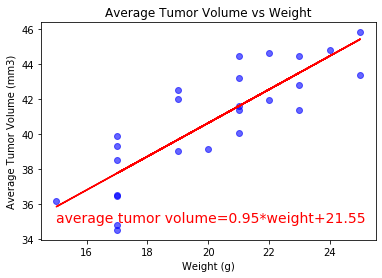

In [202]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Define x and y value
x_value=weight_ave_tumor["Weight (g)"]
y_value=weight_ave_tumor["Tumor Volume (mm3)"]

#Run regression 
regression=st.linregress(x_value,y_value)
(slope,intercept,rvalue,pvalue,stderr)=regression

#Define linear equation 
linear_equation="average tumor volume="+str(round(slope,2))+"*"+"weight"+"+"+str(round(intercept,2))

#Calcualte the regression value 
reg_value=slope*x_value+intercept

#Create scatter plot 
plt.scatter(x_value, y_value,color="blue",alpha=0.6)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight")

#Plot the regression line 
plt.plot(x_value,reg_value,"r-")
plt.annotate(linear_equation,(15,35),color="red",fontsize=14)
